In [1]:
import numpy as np
import pandas as pd
import re as re

In [2]:
df_bowling = pd.read_csv('bowler_cleaned.csv')
list_of_cols = df_bowling.columns.tolist()
list_of_cols = list_of_cols[1:]
df_bowling = df_bowling[list_of_cols]
df_bowling.head()

,date,bowler,country,overs,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,WPUJC Vaas,Sri Lanka,8.0,6,3,19,8,2.37,1,Zimbabwe,Colombo (SSC)
1,2013-07-14,Shahid Afridi,Pakistan,9.0,6,3,12,7,1.33,2,West Indies,Providence
2,2003-02-27,GD McGrath,Australia,7.0,6,4,15,7,2.14,2,Namibia,Potchefstroom
3,2017-06-09,Rashid Khan,Afghanistan,8.4,6,1,18,7,2.07,2,West Indies,Gros Islet
4,2003-03-02,AJ Bichel,Australia,10.0,6,0,20,7,2.00,1,England,Port Elizabeth


In [3]:
country_mapper = {
    'India' : 1, 'New Zealand' : 2, 'West Indies' : 3, 'Zimbabwe' : 4, 'Pakistan' : 5, 
    'Sri Lanka' : 10, 'South Africa' : 9, 'Australia' : 8, 'England' : 7, 'Ireland' : 6,
    'Scotland' : 11, 'Bangladesh' : 12, 'P.N.G.' : 13, 'Kenya' : 14, 'Hong Kong' : 15,
    'Asia XI' : 20, 'Canada' : 19, 'Netherlands' : 18, 'U.A.E.' : 17, 'Afghanistan' : 16, 
    'Africa XI' : 21, 'ICC World XI' : 22, 'Bermuda' : 23, 'Namibia' : 24, 'East Africa' : 25, 'U.S.A.' : 26
}

In [4]:
df_bowling = df_bowling.replace({'country' : country_mapper, 'opposition' : country_mapper})
df_bowling.head()

,date,bowler,country,overs,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,WPUJC Vaas,10,8.0,6,3,19,8,2.37,1,4,Colombo (SSC)
1,2013-07-14,Shahid Afridi,5,9.0,6,3,12,7,1.33,2,3,Providence
2,2003-02-27,GD McGrath,8,7.0,6,4,15,7,2.14,2,24,Potchefstroom
3,2017-06-09,Rashid Khan,16,8.4,6,1,18,7,2.07,2,3,Gros Islet
4,2003-03-02,AJ Bichel,8,10.0,6,0,20,7,2.00,1,7,Port Elizabeth


In [5]:
total_venues = len(df_bowling.ground.unique())
total_venues

173

In [6]:
numbers = range(1, len(df_bowling.ground.unique()) + 1)
venue_mapper = dict(zip(df_bowling.ground.unique(), numbers))
len(venue_mapper)

173

In [7]:
df_bowling = df_bowling.replace({'ground' : venue_mapper})
df_bowling.head()

,date,bowler,country,overs,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,WPUJC Vaas,10,8.0,6,3,19,8,2.37,1,4,1
1,2013-07-14,Shahid Afridi,5,9.0,6,3,12,7,1.33,2,3,2
2,2003-02-27,GD McGrath,8,7.0,6,4,15,7,2.14,2,24,3
3,2017-06-09,Rashid Khan,16,8.4,6,1,18,7,2.07,2,3,4
4,2003-03-02,AJ Bichel,8,10.0,6,0,20,7,2.00,1,7,5


In [8]:
numbers = range(1, len(df_bowling.bowler.unique()) + 1)
bowler_mapper = dict(zip(df_bowling.bowler.unique(), numbers))
df_bowling= df_bowling.replace({'bowler' : bowler_mapper})
df_bowling.head()

,date,bowler,country,overs,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8.0,6,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9.0,6,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7.0,6,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8.4,6,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10.0,6,0,20,7,2.00,1,7,5


In [10]:
len(df_bowling)

88296

In [11]:
df_temp = df_bowling[df_bowling.overs == 'DNB']
df_bowling = df_bowling.drop(df_temp.index, axis=0)
df_temp = df_bowling[df_bowling.overs == 'TDNB']
df_bowling = df_bowling.drop(df_temp.index, axis=0)
df_bowling.head()

,date,bowler,country,overs,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8.0,6,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9.0,6,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7.0,6,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8.4,6,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10.0,6,0,20,7,2.00,1,7,5


In [12]:
len(df_bowling)

47679

In [12]:
df_bowling.overs[0]

'8.0'

In [13]:
total_overs = df_bowling['overs']
total_overs = total_overs.str.split('.').tolist()
df=pd.DataFrame(total_overs)
df.columns=['overs', 'partials']
df_bowling['overs'] = df['overs']
df_bowling.insert(4, 'partials', df['partials'], allow_duplicates=True)
df_bowling.head()

,date,bowler,country,overs,partials,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8,0,6,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9,0,6,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7,0,6,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8,4,6,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10,0,6,0,20,7,2.00,1,7,5


In [14]:
df_temp = df_bowling[df_bowling.runs == '-']
df_bowling = df_bowling.drop(df_temp.index, axis=0)
df_temp = df_bowling[df_bowling.econ == '-']
df_bowling = df_bowling.drop(df_temp.index, axis=0)
df_bowling.head()

,date,bowler,country,overs,partials,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8,0,6,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9,0,6,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7,0,6,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8,4,6,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10,0,6,0,20,7,2.00,1,7,5


In [15]:
len(df_bowling)

47628

In [16]:
df_bowling.maidens = df_bowling.maidens.str.replace('-', '0')
#df_bowling.econ = df_bowling.econ.str.replace('-', '0')

In [17]:
df_bowling.overs = pd.to_numeric(df_bowling.overs)
df_bowling.partials = pd.to_numeric(df_bowling.partials)
df_bowling.bpo = pd.to_numeric(df_bowling.bpo)
df_bowling.maidens = pd.to_numeric(df_bowling.maidens)
df_bowling.runs = pd.to_numeric(df_bowling.runs)
df_bowling.wkts = pd.to_numeric(df_bowling.wkts)
df_bowling.econ = pd.to_numeric(df_bowling.econ)

In [18]:
len(df_bowling)

47628

In [19]:
df_bowling.head()

,date,bowler,country,overs,partials,bpo,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8,0,6,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9,0,6,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7,0,6,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8,4,6,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10,0,6,0,20,7,2.00,1,7,5


In [20]:
X = df_bowling.overs.tolist()
Y = df_bowling.partials.tolist()
Z = df_bowling.bpo.tolist()
balls = list(map(lambda x, y, z : (x * z) + y, X, Y, Z))
len(balls)

47628

In [21]:
df=pd.DataFrame(balls)
df.columns=['balls']
df_bowling.insert(6, 'balls', df['balls'], allow_duplicates=True)
df_bowling.head()

,date,bowler,country,overs,partials,bpo,balls,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8,0,6,48.0,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9,0,6,54.0,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7,0,6,42.0,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8,4,6,52.0,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10,0,6,60.0,0,20,7,2.00,1,7,5


In [22]:
df_bowling.partials = [round(x / 6, 2) for x in df_bowling.partials]
#df_bowling.partials = round(df_bowling.partials.tolist()/6, 2)
df_bowling.head()

,date,bowler,country,overs,partials,bpo,balls,maidens,runs,wkts,econ,inns,opposition,ground
0,2001-12-08,1,10,8,0.00,6,48.0,3,19,8,2.37,1,4,1
1,2013-07-14,2,5,9,0.00,6,54.0,3,12,7,1.33,2,3,2
2,2003-02-27,3,8,7,0.00,6,42.0,4,15,7,2.14,2,24,3
3,2017-06-09,4,16,8,0.67,6,52.0,1,18,7,2.07,2,3,4
4,2003-03-02,5,8,10,0.00,6,60.0,0,20,7,2.00,1,7,5


In [23]:
country_1_players = df_bowling[df_bowling.country == 1]
country_8_players = df_bowling[df_bowling.country == 8]

In [24]:
temp = country_1_players.bowler.unique()
team_1_players = temp.tolist()
temp = country_8_players.bowler.unique()
team_8_players = temp.tolist()

In [25]:
len(team_8_players)

163

In [26]:
players_team_1 = []
for player in team_1_players:
    df_temp = country_1_players[country_1_players.bowler == player]
    df_temp = df_temp.sort_values(by=['date'])
    players_team_1.append(df_temp)
players_team_8 = []
for player in team_8_players:
    df_temp = country_8_players[country_8_players.bowler == player]
    df_temp = df_temp.sort_values(by=['date'])
    players_team_8.append(df_temp)

In [27]:
players_team_1[0].head()

,date,bowler,country,overs,partials,bpo,balls,maidens,runs,wkts,econ,inns,opposition,ground
30166,2014-01-28,13,1,1,0.00,6,6.0,0,8,0,8.00,2,2,34
35346,2014-02-28,13,1,4,0.00,6,24.0,0,22,0,5.50,2,10,106
12,2014-06-17,13,1,4,0.67,6,28.0,2,4,6,0.85,2,12,11
13282,2014-11-13,13,1,8,0.00,6,48.0,0,55,2,6.87,2,10,12
18665,2014-11-16,13,1,8,0.00,6,48.0,1,28,1,3.50,1,10,148


In [29]:
list_data_of_player_for_model_1 = []
list_ID_of_player_in_model_1 = []
for player_stats in players_team_1:
    temp = 0
    match_count = 0
    match_no = []
    r_econ = []
    r_mdns = []
    c_econ = []
    c_mdns = []
    label = []
    runs = player_stats.runs.tolist()
    overs = player_stats.overs.tolist()
    partials = player_stats.partials.tolist()
    maidens = player_stats.maidens.tolist()
    wickets = player_stats.wkts.tolist()
    
    if len(runs) >= 50:
        list_ID_of_player_in_model_1.append(player_stats.bowler.tolist()[0])
        for num, item  in enumerate(wickets):
            if num >= 3:
                match_count += 1
                match_no.append(match_count)
                recent_runs = runs[num - 1] + runs[num - 2] + runs[num - 3]
                recent_overs = overs[num - 1] + overs[num - 2] + overs[num - 3]
                recent_partials = partials[num - 1] + partials[num - 2] + partials[num - 3]
                recent_complete_overs = recent_overs + recent_partials
                
                total_runs = sum(runs[:num])
                total_overs = sum(overs[:num])
                total_partials = sum(partials[:num])
                total_complete_overs = total_overs + total_partials
                
                recent_maidens = maidens[num - 1] + maidens[num - 2] + maidens[num - 3]
                complete_maidens = sum(maidens[:num])
                
                temp = round((recent_runs / recent_complete_overs), 2)
                r_econ.append(temp)
                temp = round((total_runs / total_complete_overs), 2)
                c_econ.append(temp)
                r_mdns.append(recent_maidens)
                c_mdns.append(complete_maidens)
                label.append(wickets[num])
                
        model_batsman_data = {
            'No' : match_no,
            'R_Econ' : r_econ,
            'R_Mdns' : r_mdns,
            'C_Econ' : c_econ,
            'C_Mdns' : c_mdns,
            'label': label
        }
    
        df_temp = pd.DataFrame(model_batsman_data)
        list_data_of_player_for_model_1.append(df_temp)

In [31]:
list_data_of_player_for_model_8 = []
list_ID_of_player_in_model_8 = []
for player_stats in players_team_8:
    temp = 0
    match_count = 0
    match_no = []
    r_econ = []
    r_mdns = []
    c_econ = []
    c_mdns = []
    label = []
    runs = player_stats.runs.tolist()
    overs = player_stats.overs.tolist()
    partials = player_stats.partials.tolist()
    maidens = player_stats.maidens.tolist()
    wickets = player_stats.wkts.tolist()
    
    if len(runs) >= 50:
        list_ID_of_player_in_model_8.append(player_stats.bowler.tolist()[0])
        for num, item  in enumerate(wickets):
            if num >= 3:
                match_count += 1
                match_no.append(match_count)
                recent_runs = runs[num - 1] + runs[num - 2] + runs[num - 3]
                recent_overs = overs[num - 1] + overs[num - 2] + overs[num - 3]
                recent_partials = partials[num - 1] + partials[num - 2] + partials[num - 3]
                recent_complete_overs = recent_overs + recent_partials
                
                total_runs = sum(runs[:num])
                total_overs = sum(overs[:num])
                total_partials = sum(partials[:num])
                total_complete_overs = total_overs + total_partials
                
                recent_maidens = maidens[num - 1] + maidens[num - 2] + maidens[num - 3]
                complete_maidens = sum(maidens[:num])
                
                temp = round((recent_runs / recent_complete_overs), 2)
                r_econ.append(temp)
                temp = round((total_runs / total_complete_overs), 2)
                c_econ.append(temp)
                r_mdns.append(recent_maidens)
                c_mdns.append(complete_maidens)
                label.append(wickets[num])
                
        model_batsman_data = {
            'No' : match_no,
            'R_Econ' : r_econ,
            'R_Mdns' : r_mdns,
            'C_Econ' : c_econ,
            'C_Mdns' : c_mdns,
            'label': label
        }
    
        df_temp = pd.DataFrame(model_batsman_data)
        list_data_of_player_for_model_8.append(df_temp)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [33]:
predict_data_1 = []
model_data_1 = []
train_accuracy_1 = []
test_accuracy_1 = []
predict_label_1 = []
actual_label_1 = []

for player_data in list_data_of_player_for_model_1:
    
    scaler = MinMaxScaler()
    df_dataset = pd.DataFrame()
    df_dataset = player_data

    list_of_cols = df_dataset.columns.tolist()
    list_of_cols = list_of_cols[: -1]
    X = df_dataset[list_of_cols]
    y = df_dataset['label']
    X = scaler.fit_transform(X)
    
    input_predict = X[len(X)-1:]
    #print(input_predict[0])
    #input_predict = input_predict.values.tolist()[0]
    predict_data_1.append(input_predict[0])
    label = y[len(y)-1:].values.tolist()[0]
    actual_label_1.append(label)
    X = X[:len(X) - 1]
    y = y[:len(y) - 1]
    model_data_1.append(player_data)
    #model = df_dataset[:len(df_dataset)-1]
    #model_data.append(df_dataset[:len(df_dataset)-1])
    #input_predict = df_dataset[len(df_dataset)-1:]
    #label = input_predict.label.tolist()[0]
    #actual_label.append(label)
    #input_predict = input_predict.values.tolist()[0]
    #predict_data.append(input_predict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    
    temp = round(linreg.score(X_train, y_train) * 100, 2)
    train_accuracy_1.append(temp)
    temp = round(linreg.score(X_test, y_test) * 100, 2)
    test_accuracy_1.append(temp)
    temp = linreg.predict(input_predict)[0]
    predict_label_1.append(temp)

In [34]:
print(actual_label_1)

[3, 2, 1, 0, 0, 1, 1, 0, 0, 2, 5, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 0, 2, 4, 2, 1, 0, 0, 1, 1, 1, 0]


In [35]:
print(predict_label_1)

[1.0791403543403577, 1.2378608827135489, 1.7025438381390987, 1.5160745997577745, 1.3982002870420764, 0.76291206905298625, 0.74090246508131585, 0.50221809006227547, 1.3934058757718932, 1.0184470052648056, 1.2620156795426138, 1.4803265143372002, 0.59503292584638467, 0.54540172983925617, 0.85883671149564389, 1.009926348600015, 1.6665902722552246, 1.1773869226532532, 1.190014254045068, 0.68497481519518932, 0.58075899440231415, 1.3925303158904838, 1.0932596377647652, 0.60567753034408089, 1.6938348117901367, 0.62108491269738586, 2.2689610325157155, 1.5349193004484654, 1.234015830493187, 2.2998110667058485, 0.95728063671950481, 0.415910595694024, 0.26394263566431753, 0.44671958668550604, 0.35882953440267118]


In [36]:
predict_label_1 = list(map(lambda x: int(round(x)), predict_label_1))
predict_label_1 = list(map(lambda x: abs(x), predict_label_1))
predict_label_1

[1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0]

In [37]:
predict_data_2 = []
model_data_2 = []
train_accuracy_2 = []
test_accuracy_2 = []
predict_label_2 = []
actual_label_2 = []

for player_data in list_data_of_player_for_model_8:
    
    scaler = MinMaxScaler()
    df_dataset = pd.DataFrame()
    df_dataset = player_data

    list_of_cols = df_dataset.columns.tolist()
    list_of_cols = list_of_cols[: -1]
    X = df_dataset[list_of_cols]
    y = df_dataset['label']
    X = scaler.fit_transform(X)
    
    input_predict = X[len(X)-1:]
    #print(input_predict[0])
    #input_predict = input_predict.values.tolist()[0]
    predict_data_2.append(input_predict[0])
    label = y[len(y)-1:].values.tolist()[0]
    actual_label_2.append(label)
    X = X[:len(X) - 1]
    y = y[:len(y) - 1]
    model_data_2.append(player_data)
    #model = df_dataset[:len(df_dataset)-1]
    #model_data.append(df_dataset[:len(df_dataset)-1])
    #input_predict = df_dataset[len(df_dataset)-1:]
    #label = input_predict.label.tolist()[0]
    #actual_label.append(label)
    #input_predict = input_predict.values.tolist()[0]
    #predict_data.append(input_predict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    
    temp = round(linreg.score(X_train, y_train) * 100, 2)
    train_accuracy_2.append(temp)
    temp = round(linreg.score(X_test, y_test) * 100, 2)
    test_accuracy_2.append(temp)
    temp = linreg.predict(input_predict)[0]
    predict_label_2.append(temp)

In [38]:
print(actual_label_2)

[1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0]


In [39]:
print(predict_label_2)

[1.7999745110979433, 0.60033522031440478, 3.1015027585769444, 1.8055108959536819, 1.5863067919422795, 1.2174279013240141, 1.6205904706748142, 1.1027749438676102, 1.7519004144021559, 0.66657247716254653, 1.2474939017626072, 1.6588146757020925, 0.56155928350929374, 1.586928131292737, 2.2795465791765217, 1.4925215063621837, 0.1823726312544699, 1.4968589415480034, 0.26631003985059798, 1.2233710093868271, 1.5266499311914434, 0.53370795444515018, 1.0893352858432643, 1.5952114649328868, 1.7008405769824335, 1.3306911265786754, 2.0116983724406605, 0.15465356586053169, 1.502984391551706, 0.83921644646681859, 2.160459154280931, 0.34051363202971718, 0.68979550240270049, 1.6175232284703165, 0.62104650627053193, 0.89374219724790205, 1.5290918639054845, 1.0425745877014614, 1.5060123476450098, 0.43858671215987954]


In [40]:
predict_label_2 = list(map(lambda x: int(round(x)), predict_label_2))
predict_label_2 = list(map(lambda x: abs(x), predict_label_2))
predict_label_2

[2,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0]

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sb

In [42]:
len(list_ID_of_player_in_model_8)

40

<IPython.core.display.Javascript object>


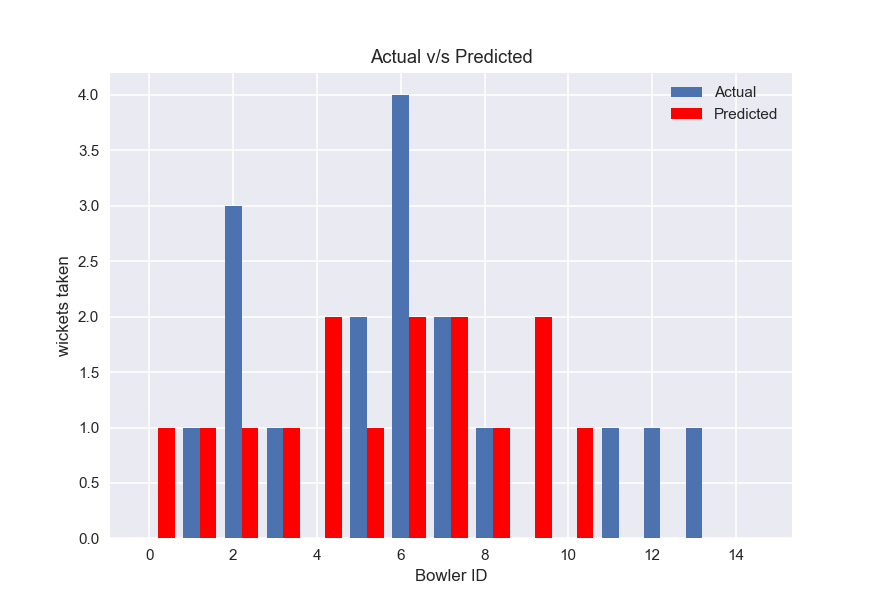

In [48]:
xvals_1 = range(len(list_ID_of_player_in_model_1[20:]))
data_1 = np.array(actual_label_1[20:])
data_2 = np.array(predict_label_1[20:])
plt.figure()
plt.bar(xvals_1, data_1, width=0.4)
plt.bar(np.array(xvals_1) + 0.4, data_2, width=0.4, color='red')
plt.xlabel('Bowler ID')
plt.ylabel('wickets taken')
plt.title('Actual v/s Predicted')
plt.legend(['Actual', 'Predicted'], loc=1)